# Análise da avaliação de filmes

Para a realização dessa análise, foi utilizada uma base de dados relativa a filmes e suas notas obtidas no site [MovieLens](https://movielens.org/) e [TMDB](https://www.themoviedb.org/) (The movie data base), utilizando a biblioteca Pandas e gerando visualizações de dados, que dão suporte à análise, por meio da biblioteca Seaborn.

In [ ]:
# Importando biblioteca pandas
import pandas as pd

# Conhecendo os dados

In [ ]:
notas = pd.read_csv("/content/ratings.csv")

# 5 primeiras linhas da tabela
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# Qtd. de linhas e colunas
notas.shape

(100836, 4)

In [ ]:
# Redefinir nomes das colunas originais
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Analisando as notas em Geral (Análise exploratória)

In [ ]:
# Valores únicos disponíveis para nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
# Qtd de vezes que cada valor se repete
notas['nota'].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
# Média das notas
print("Média", notas['nota'].mean())

# Mediana das notas
print("Mediana", notas.nota.median())

Média 3.501556983616962
Mediana 3.5


<Axes: ylabel='Frequency'>

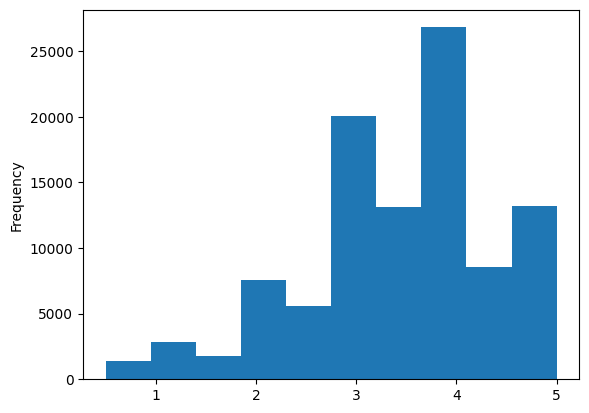

In [ ]:
# Histograma de qtd de notas
notas.nota.plot(kind='hist')

In [ ]:
# Descrição breve da coluna inteira
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

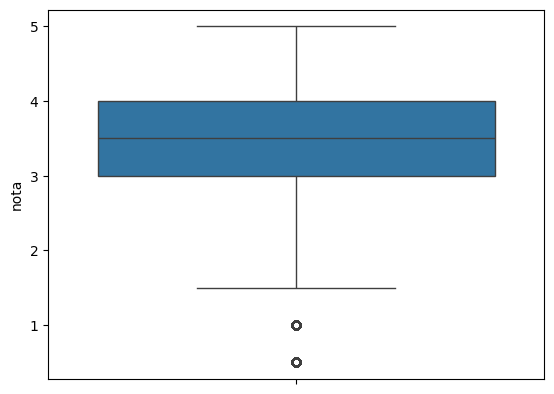

In [ ]:
import seaborn as sns

sns.boxplot(notas.nota)

In [ ]:
filmes = pd.read_csv('/content/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando as notas de filmes específicos

In [ ]:
# Dados cujo o filmeId = 1
notas.query("filmeId==1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [ ]:
# Exibe as notas dos dados cujo filmeId = 1
notas.query('filmeId==1').nota

,nota
0,4.0
516,4.0
874,4.5
1434,2.5
1667,4.5
...,...
97364,2.5
98479,4.0
98666,2.5
99497,3.0


In [ ]:
nota_ToyStory = notas.query('filmeId==1').nota.mean()
print("Média de notas do filme Toy Story:", nota_ToyStory)

Média de notas do filme Toy Story: 3.9209302325581397


In [ ]:
nota_Jumanji = notas.query('filmeId==2').nota.mean()
print("Média de notas do filme Jumanji:", nota_Jumanji)

Média de notas do filme Jumanji: 3.4318181818181817


In [ ]:
# Agrupa a média de cada coluna p/ cada filmeId
notas.groupby("filmeId").mean()

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [ ]:
# Agrupa a média só da coluna nota para cada filme
media_por_filme = notas.groupby('filmeId').mean().nota
media_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

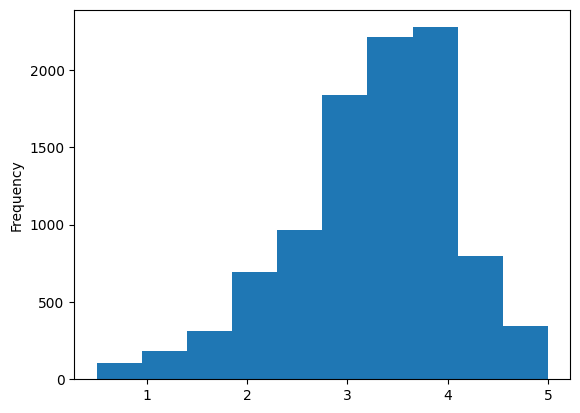

In [ ]:
media_por_filme.plot(kind='hist')

# Utilizando o Seaborn

<Axes: xlabel='nota'>

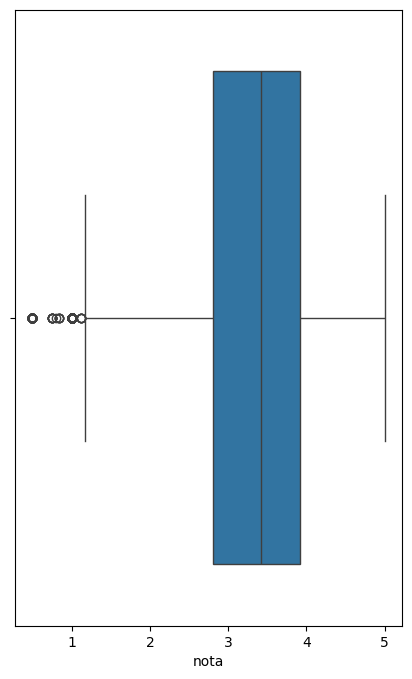

In [ ]:
# Matplot: biblioteca mais baixo nível e utilizada por pandas e seaborn
import matplotlib.pyplot as plt

# Pode usar funções do matplot pra configurar funções do seaborn (que utiliza o matplot por trás)
plt.figure(figsize= (5,8))

# X muda o eixo do gráfico
sns.boxplot(x=media_por_filme)

In [ ]:
media_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


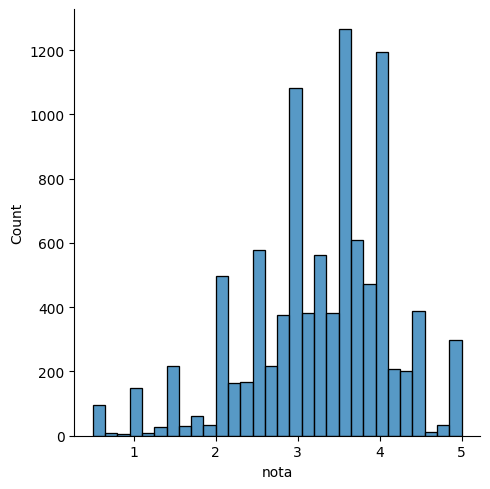

In [ ]:
# Bins dividem o gráfico em mais partições
sns.displot(media_por_filme, bins = 30)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

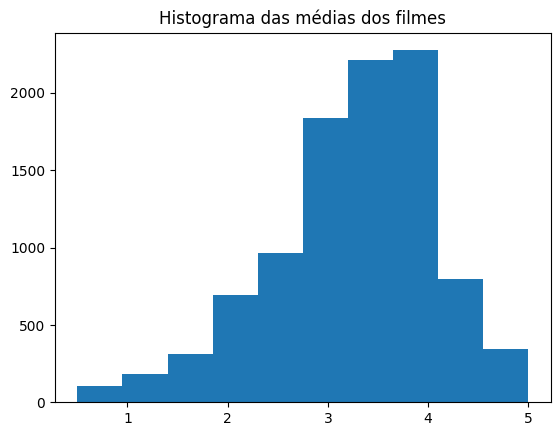

In [ ]:
plt.hist(media_por_filme)
plt.title("Histograma das médias dos filmes")

In [ ]:
tmdb = pd.read_csv('/content/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
# Línguas únicas no dataframe (categórico nominal)
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Visualização dos dados

In [ ]:
tmdb.original_language.value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [ ]:
# Transforma série em dataframe e torna indíce (língua) em nova coluna
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()

contagem_de_lingua.columns = ['original_language', 'total']

contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


Para comparar categorias verificar documentação no site seaborn: https://seaborn.pydata.org/tutorial/categorical.html

<Axes: xlabel='original_language', ylabel='total'>

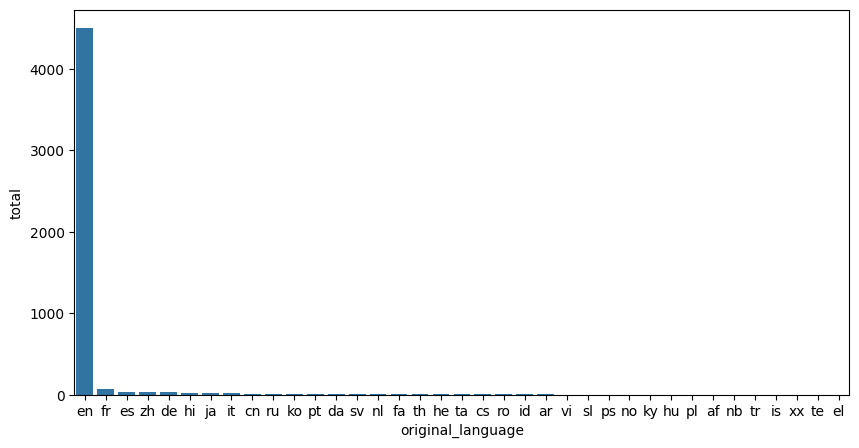

In [ ]:
plt.figure(figsize= (10,5))

# Gráfico para comparar categorias
sns.barplot(x ='original_language', y ='total', data = contagem_de_lingua)

<Figure size 1000x500 with 0 Axes>

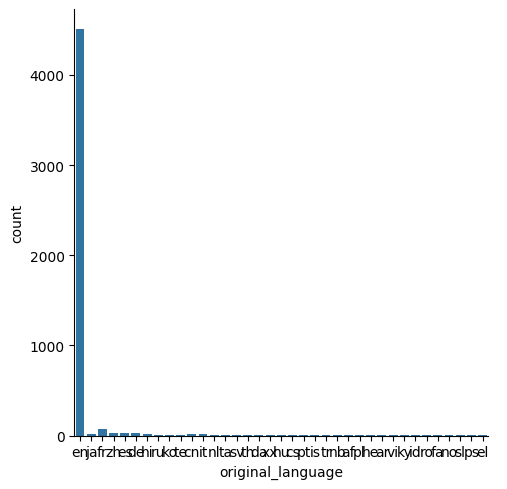

In [ ]:
plt.figure(figsize= (10,5))

# Maneira de criar gráfico de categorias direto sem criar tabela de value counts
sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7863d4b4cd30>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

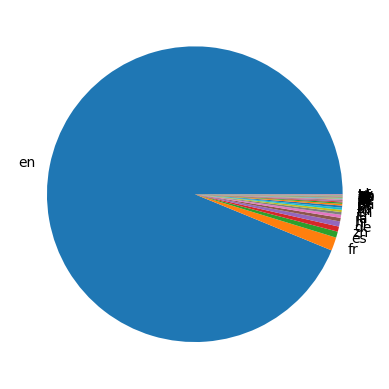

In [ ]:
# Pie não é adequado para analisar conjunto com muitos atributos diferentes
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

Melhor forma de vizualizar: Comparar inglês com todas as demais línguas

In [ ]:
total_por_lingua = tmdb.original_language.value_counts()

# Soma de todos os valores de total_por_lingua
total_geral = total_por_lingua.sum()

# Localiza somente valores que tenham 'en' como língua
total_ingles = total_por_lingua.loc['en']

total_do_resto = total_geral - total_ingles

print(total_ingles, total_do_resto)

4505 298


In [ ]:
# Cria tabela com dados
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles, total_do_resto]
}

# Cria dataframe da tabela dados
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

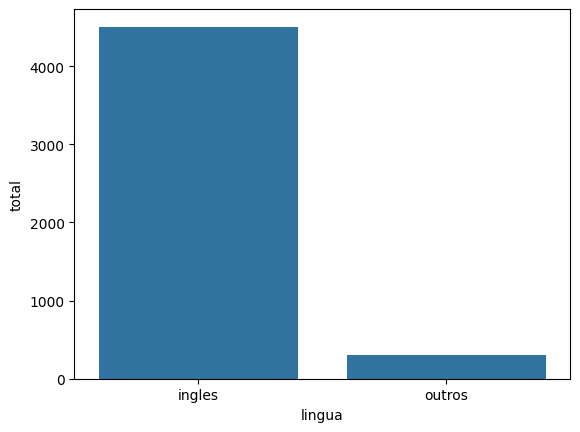

In [ ]:
sns.barplot(x='lingua', y='total', data = dados)

([<matplotlib.patches.Wedge at 0x7863d486b100>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

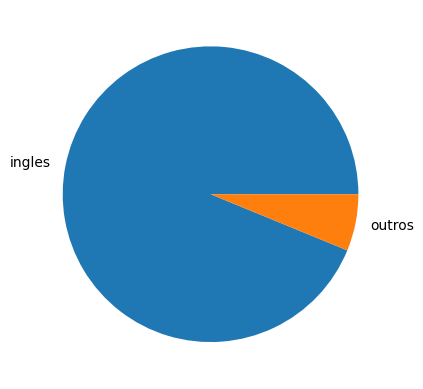

In [ ]:
# Gráfico de pizza não ajuda muito nesse caso
plt.pie(dados['total'], labels = dados['lingua'])

In [ ]:
# Contagem de valores de outros idiomas q não sejam inglês
total_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_outras_linguas

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


<ipython-input-39-17743aa9f509>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'original_language', kind = 'count',


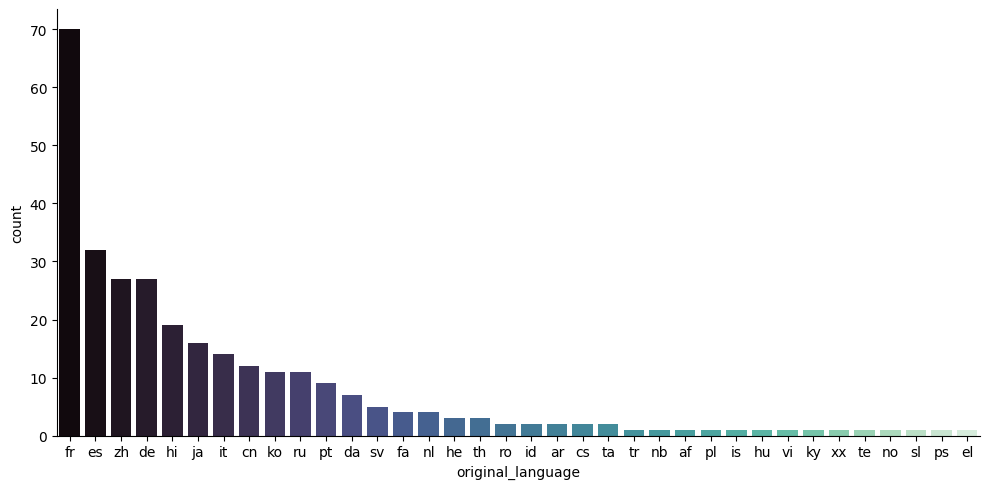

In [ ]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = 'original_language', kind = 'count',
            data = filmes_sem_lingua_original_em_ingles,
            palette = "mako",                         # Paleta sequencial de cores, link : https://seaborn.pydata.org/tutorial/color_palettes.html
            aspect = 2,                                 # Muda tamanho para retângulo - próprio do tipo: catplot
            order = total_outras_linguas.index)         # Ordena do mais recorrente pro menos recorrente já que aconteceu isso quando fizemos a tabela total_outras_linguas

#Comparação entre filmes - com medidas estatísticas

In [ ]:
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Reune todas as notas do toy Story
notas_do_toy_story = notas.query('filmeId == 1')

nota_media_toy_story = notas_do_toy_story.nota.mean()

print("Quantidade de notas do Toy Story 1995:", len(notas_do_toy_story))

print("Nota média do Toy Stoy: %.2f" % nota_media_toy_story)

# Reune todas as notas do Jumanji
notas_do_jumanji = notas.query('filmeId == 2')

nota_media_jumaji = notas_do_jumanji.nota.mean()

print("Quantidade de notas do Jumanji 1995:", len(notas_do_jumanji))

print("Nota média do Jumanji: %.2f" % nota_media_jumaji)

Quantidade de notas do Toy Story 1995: 215
Nota média do Toy Stoy: 3.92
Quantidade de notas do Jumanji 1995: 110
Nota média do Jumanji: 3.43


In [ ]:
print("Nota mediana do Toy Stoy: %.2f" % notas_do_toy_story.nota.median())

print("Nota mediana do Jumanji: %.2f" % notas_do_jumanji.nota.median())

Nota mediana do Toy Stoy: 4.00
Nota mediana do Jumanji: 3.50


In [ ]:
qtd_notas = notas_do_toy_story.nota.value_counts()

qtd_notas

,count
nota,
4.0,82
5.0,47
3.0,34
4.5,18
3.5,18
2.5,8
2.0,6
0.5,1
1.5,1


In [ ]:
# Biblioteca para trabalhar com arrays
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x7863c9c5fa60>,
 'caps': [<matplotlib.lines.Line2D at 0x7863c9c5f5e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7863c9c5df90>,
 'medians': [<matplotlib.lines.Line2D at 0x7863c9c5c340>,
 'fliers': [<matplotlib.lines.Line2D at 0x7863c9c5ece0>,
 'means': []}

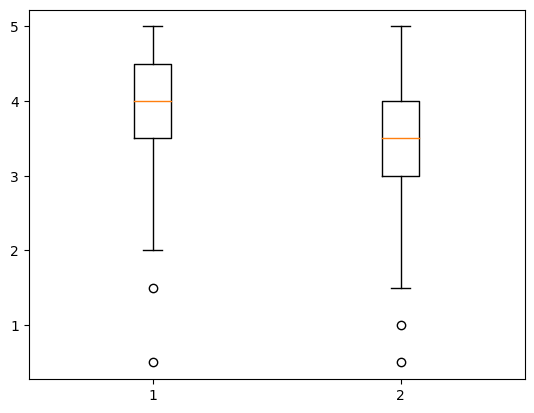

In [ ]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

<Axes: xlabel='filmeId', ylabel='nota'>

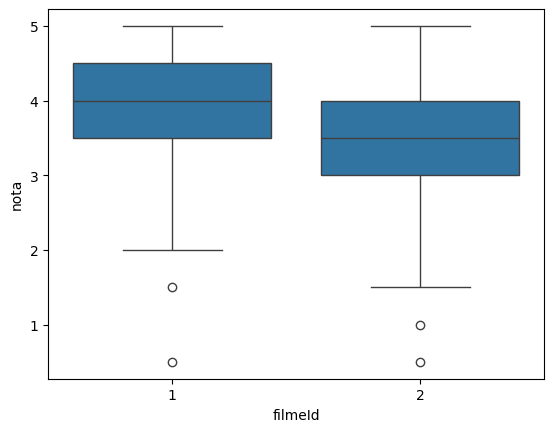

In [ ]:
# Boxplot com montante no qual filmeId = 1 ou 2
sns.boxplot(x = 'filmeId', y = 'nota', data = notas.query('filmeId in [1, 2]'))

In [ ]:
# Desvio padrão das notas do Jumanji
notas_do_jumanji.nota.std()

0.8817134921476455